In [1]:
import pandas as pd
import numpy as np
import re
from tqdm import tqdm

from nltk.corpus import stopwords

from gensim.models import Word2Vec
from gensim.models import Phrases
from gensim.models.phrases import Phraser

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

%matplotlib inline


#for Label Encoding
from sklearn.preprocessing import LabelEncoder

#for Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#for Data splitting
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

import random



D:\Anaconda\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [2]:
data = pd.read_csv('trainset_new1.csv')

In [3]:
data.head()

,text,class
0,Supply Quality China's EXCLUSIVE dimensions at...,1
1,over. SidLet me know. Thx.,0
2,"Dear Friend,Greetings to you.I wish to accost ...",1
3,MR. CHEUNG PUIHANG SENG BANK LTD.DES VOEUX RD....,1
4,Not a surprising assessment from Embassy.,0


In [4]:
data.shape

(15446, 2)

In [5]:
# get stop words from nltk
stopWords = stopwords.words('english')

# pre processing data
def cleanData(sentence):
    processedList = ""
    
    # convert to lowercase, ignore all special characters - keep only alpha-numericals and spaces (not removing full-stop here)
    sentence = re.sub(r'[^A-Za-z0-9\s.]',r'',str(sentence).lower())
    sentence = re.sub(r'\n',r' ',sentence)
    
    # remove stop words
    sentence = " ".join([word for word in sentence.split() if word not in stopWords])
    
    return sentence

In [6]:
# clean data 
data['text'] = data['text'].map(lambda x: cleanData(x))

In [7]:
data.head()

,text,class
0,supply quality chinas exclusive dimensions unb...,1
1,over. sidlet know. thx.,0
2,dear friendgreetings you.i wish accost request...,1
3,mr. cheung puihang seng bank ltd.des voeux rd....,1
4,surprising assessment embassy.,0


In [8]:
import re
import nltk 

from nltk.corpus import stopwords
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import SnowballStemmer
snowball_stemmer = SnowballStemmer("english")
porter_stemmer = PorterStemmer()

from nltk.tokenize import RegexpTokenizer
from nltk.stem.wordnet import WordNetLemmatizer

stop_words=stopwords.words("english")

In [9]:
import string
def dataClean(text):
    message = re.sub('[^a-zA-Z]',' ', str(text))
    message = message.split()
    return " ".join(message)

data['text'] = data['text'].apply(dataClean)
data.head(n = 10)

,text,class
0,supply quality chinas exclusive dimensions unb...,1
1,over sidlet know thx,0
2,dear friendgreetings you i wish accost request...,1
3,mr cheung puihang seng bank ltd des voeux rd b...,1
4,surprising assessment embassy,0
5,hreis already locked tonite seeing right actually,0
6,pis print fw whi powder coating,0
7,dear tom could schedule calli several matters ...,0
8,greetings barrister robert williams dear frien...,1
9,fyi thanks signing book hope get royalties mon...,0


In [10]:
import string
def stemming_lemmatisation(text):
    message = text.split()
    words = [snowball_stemmer.stem(word) for word in message if word not in stop_words]
    lem = WordNetLemmatizer()
    words = [lem.lemmatize(word) for word in message if not word in  stop_words]
    return " ".join(words)

data["text"] = data["text"].apply(stemming_lemmatisation)
data.head(n = 10)

,text,class
0,supply quality china exclusive dimension unbea...,1
1,sidlet know thx,0
2,dear friendgreetings wish accost request would...,1
3,mr cheung puihang seng bank ltd de voeux rd br...,1
4,surprising assessment embassy,0
5,hreis already locked tonite seeing right actually,0
6,pi print fw whi powder coating,0
7,dear tom could schedule callus several matter ...,0
8,greeting barrister robert williams dear friend...,1
9,fyi thanks signing book hope get royalty mongo...,0


In [11]:
tmp_corpus = data['text'].map(lambda x: x.split('.'))

In [12]:
corpus = []
for i in tqdm(range(len(tmp_corpus))):
    for line in tmp_corpus[i]:
        words = [x for x in line.split()]
        corpus.append(words)

100%|█████████████████████████████████████████████████████████████████████████| 15446/15446 [00:00<00:00, 46331.75it/s]


In [39]:
num_of_sentences = len(corpus)
num_of_words = 0
for line in corpus:
    num_of_words += len(line)

In [14]:
phrases = Phrases(sentences=corpus,min_count=25,threshold=50)
bigram = Phraser(phrases)

2022-10-31 19:56:15,128 : INFO : collecting all words and their counts
2022-10-31 19:56:15,128 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2022-10-31 19:56:16,905 : INFO : PROGRESS: at sentence #10000, processed 1108283 words and 590276 word types
2022-10-31 19:56:18,017 : INFO : collected 903088 token types (unigram + bigrams) from a corpus of 1763161 words and 15446 sentences
2022-10-31 19:56:18,017 : INFO : merged Phrases<903088 vocab, min_count=25, threshold=50, max_vocab_size=40000000>
2022-10-31 19:56:18,017 : INFO : Phrases lifecycle event {'msg': 'built Phrases<903088 vocab, min_count=25, threshold=50, max_vocab_size=40000000> in 2.89s', 'datetime': '2022-10-31T19:56:18.017848', 'gensim': '4.0.1', 'python': '3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19041-SP0', 'event': 'created'}
2022-10-31 19:56:18,024 : INFO : exporting phrases from Phrases<903088 vocab, min_count=25, threshold=50, max_vocab_si

In [15]:
for index,sentence in enumerate(corpus):
    corpus[index] = bigram[sentence]

In [16]:
def shuffle_corpus(sentences):
    shuffled = list(sentences)
    random.shuffle(shuffled)
    return shuffled

In [17]:
size = 100
window_size = 7 
epochs = 100
min_count = 10
workers = 4

model = Word2Vec(corpus, sg=1,window=window_size,vector_size=size,\
                               min_count=min_count,workers=workers,epochs=epochs,sample=0.01)

2022-10-31 19:56:22,275 : INFO : collecting all words and their counts
2022-10-31 19:56:22,275 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2022-10-31 19:56:22,537 : INFO : PROGRESS: at sentence #10000, processed 1016228 words, keeping 124029 word types
2022-10-31 19:56:22,704 : INFO : collected 163522 word types from a corpus of 1636830 raw words and 15446 sentences
2022-10-31 19:56:22,704 : INFO : Creating a fresh vocabulary
2022-10-31 19:56:22,837 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=10 retains 13819 unique words (8.450850650065435%% of original 163522, drops 149703)', 'datetime': '2022-10-31T19:56:22.837532', 'gensim': '4.0.1', 'python': '3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19041-SP0', 'event': 'prepare_vocab'}
2022-10-31 19:56:22,837 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=10 leaves 1374687 word corpus (83.98471435640842%% of original 1636830

2022-10-31 19:56:50,698 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-10-31 19:56:50,698 : INFO : EPOCH - 7 : training on 1636830 raw words (1374541 effective words) took 3.9s, 352170 effective words/s
2022-10-31 19:56:51,723 : INFO : EPOCH 8 - PROGRESS: at 27.24% examples, 339324 words/s, in_qsize 7, out_qsize 0
2022-10-31 19:56:52,792 : INFO : EPOCH 8 - PROGRESS: at 56.24% examples, 345827 words/s, in_qsize 7, out_qsize 0
2022-10-31 19:56:53,813 : INFO : EPOCH 8 - PROGRESS: at 80.13% examples, 333369 words/s, in_qsize 7, out_qsize 0
2022-10-31 19:56:54,750 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-10-31 19:56:54,750 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-10-31 19:56:54,789 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-10-31 19:56:54,820 : INFO : EPOCH 8 - PROGRESS: at 100.00% examples, 334062 words/s, in_qsize 0, out_qsize 1
2022-10-31 19:56:54,820 : INFO : worker thread

2022-10-31 19:57:29,894 : INFO : EPOCH 17 - PROGRESS: at 91.68% examples, 310145 words/s, in_qsize 7, out_qsize 0
2022-10-31 19:57:30,225 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-10-31 19:57:30,245 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-10-31 19:57:30,245 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-10-31 19:57:30,264 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-10-31 19:57:30,264 : INFO : EPOCH - 17 : training on 1636830 raw words (1374543 effective words) took 4.4s, 312825 effective words/s
2022-10-31 19:57:31,273 : INFO : EPOCH 18 - PROGRESS: at 24.67% examples, 310789 words/s, in_qsize 7, out_qsize 0
2022-10-31 19:57:32,285 : INFO : EPOCH 18 - PROGRESS: at 50.79% examples, 322550 words/s, in_qsize 7, out_qsize 0
2022-10-31 19:57:33,288 : INFO : EPOCH 18 - PROGRESS: at 77.61% examples, 334027 words/s, in_qsize 7, out_qsize 0
2022-10-31 19:57:34,251 : INFO : worker th

2022-10-31 19:58:05,821 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-10-31 19:58:05,821 : INFO : EPOCH - 26 : training on 1636830 raw words (1374539 effective words) took 3.9s, 355902 effective words/s
2022-10-31 19:58:06,815 : INFO : EPOCH 27 - PROGRESS: at 27.24% examples, 348714 words/s, in_qsize 7, out_qsize 0
2022-10-31 19:58:07,830 : INFO : EPOCH 27 - PROGRESS: at 55.55% examples, 357574 words/s, in_qsize 7, out_qsize 0
2022-10-31 19:58:08,830 : INFO : EPOCH 27 - PROGRESS: at 83.29% examples, 361072 words/s, in_qsize 7, out_qsize 0
2022-10-31 19:58:09,561 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-10-31 19:58:09,580 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-10-31 19:58:09,602 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-10-31 19:58:09,621 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-10-31 19:58:09,622 : INFO : EPOCH - 27 : training on 1636830

2022-10-31 19:58:44,283 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-10-31 19:58:44,309 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-10-31 19:58:44,316 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-10-31 19:58:44,317 : INFO : EPOCH - 36 : training on 1636830 raw words (1374527 effective words) took 3.9s, 356796 effective words/s
2022-10-31 19:58:45,320 : INFO : EPOCH 37 - PROGRESS: at 27.24% examples, 346126 words/s, in_qsize 7, out_qsize 0
2022-10-31 19:58:46,387 : INFO : EPOCH 37 - PROGRESS: at 56.25% examples, 350601 words/s, in_qsize 7, out_qsize 0
2022-10-31 19:58:47,382 : INFO : EPOCH 37 - PROGRESS: at 83.68% examples, 357573 words/s, in_qsize 7, out_qsize 0
2022-10-31 19:58:48,056 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-10-31 19:58:48,105 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-10-31 19:58:48,112 : INFO : worker thread finished; awaiting

2022-10-31 19:59:21,992 : INFO : EPOCH 46 - PROGRESS: at 53.41% examples, 337791 words/s, in_qsize 7, out_qsize 0
2022-10-31 19:59:23,009 : INFO : EPOCH 46 - PROGRESS: at 80.40% examples, 338508 words/s, in_qsize 7, out_qsize 0
2022-10-31 19:59:23,911 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-10-31 19:59:23,918 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-10-31 19:59:23,933 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-10-31 19:59:23,937 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-10-31 19:59:23,937 : INFO : EPOCH - 46 : training on 1636830 raw words (1374541 effective words) took 4.0s, 344795 effective words/s
2022-10-31 19:59:24,943 : INFO : EPOCH 47 - PROGRESS: at 26.51% examples, 337600 words/s, in_qsize 7, out_qsize 0
2022-10-31 19:59:25,947 : INFO : EPOCH 47 - PROGRESS: at 53.41% examples, 343197 words/s, in_qsize 7, out_qsize 0
2022-10-31 19:59:26,963 : INFO : EPOCH 47 

2022-10-31 19:59:59,781 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-10-31 19:59:59,782 : INFO : EPOCH - 55 : training on 1636830 raw words (1374538 effective words) took 3.9s, 349620 effective words/s
2022-10-31 20:00:00,796 : INFO : EPOCH 56 - PROGRESS: at 25.95% examples, 327074 words/s, in_qsize 7, out_qsize 0
2022-10-31 20:00:01,821 : INFO : EPOCH 56 - PROGRESS: at 52.04% examples, 330201 words/s, in_qsize 8, out_qsize 0
2022-10-31 20:00:02,846 : INFO : EPOCH 56 - PROGRESS: at 80.40% examples, 339047 words/s, in_qsize 7, out_qsize 0
2022-10-31 20:00:03,761 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-10-31 20:00:03,779 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-10-31 20:00:03,795 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-10-31 20:00:03,829 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-10-31 20:00:03,829 : INFO : EPOCH - 56 : training on 1636830

2022-10-31 20:00:39,741 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-10-31 20:00:39,817 : INFO : EPOCH 65 - PROGRESS: at 99.48% examples, 329150 words/s, in_qsize 2, out_qsize 1
2022-10-31 20:00:39,817 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-10-31 20:00:39,817 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-10-31 20:00:39,827 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-10-31 20:00:39,827 : INFO : EPOCH - 65 : training on 1636830 raw words (1374535 effective words) took 4.1s, 332419 effective words/s
2022-10-31 20:00:40,838 : INFO : EPOCH 66 - PROGRESS: at 26.62% examples, 341498 words/s, in_qsize 8, out_qsize 0
2022-10-31 20:00:41,858 : INFO : EPOCH 66 - PROGRESS: at 54.17% examples, 343805 words/s, in_qsize 7, out_qsize 0
2022-10-31 20:00:42,890 : INFO : EPOCH 66 - PROGRESS: at 82.01% examples, 347635 words/s, in_qsize 7, out_qsize 0
2022-10-31 20:00:43,701 : INFO : worker th

2022-10-31 20:01:16,607 : INFO : EPOCH 75 - PROGRESS: at 25.34% examples, 323889 words/s, in_qsize 7, out_qsize 0
2022-10-31 20:01:17,616 : INFO : EPOCH 75 - PROGRESS: at 52.15% examples, 334536 words/s, in_qsize 7, out_qsize 0
2022-10-31 20:01:18,636 : INFO : EPOCH 75 - PROGRESS: at 79.54% examples, 340916 words/s, in_qsize 7, out_qsize 0
2022-10-31 20:01:19,561 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-10-31 20:01:19,575 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-10-31 20:01:19,606 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-10-31 20:01:19,608 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-10-31 20:01:19,609 : INFO : EPOCH - 75 : training on 1636830 raw words (1374560 effective words) took 4.0s, 344378 effective words/s
2022-10-31 20:01:20,621 : INFO : EPOCH 76 - PROGRESS: at 26.62% examples, 339765 words/s, in_qsize 7, out_qsize 0
2022-10-31 20:01:21,631 : INFO : EPOCH 76 

2022-10-31 20:01:55,535 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-10-31 20:01:55,553 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-10-31 20:01:55,554 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-10-31 20:01:55,554 : INFO : EPOCH - 84 : training on 1636830 raw words (1374524 effective words) took 4.1s, 332449 effective words/s
2022-10-31 20:01:56,576 : INFO : EPOCH 85 - PROGRESS: at 25.90% examples, 325836 words/s, in_qsize 7, out_qsize 0
2022-10-31 20:01:57,580 : INFO : EPOCH 85 - PROGRESS: at 51.32% examples, 328553 words/s, in_qsize 7, out_qsize 0
2022-10-31 20:01:58,617 : INFO : EPOCH 85 - PROGRESS: at 78.69% examples, 335043 words/s, in_qsize 7, out_qsize 0
2022-10-31 20:01:59,538 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-10-31 20:01:59,601 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-10-31 20:01:59,619 : INFO : EPOCH 85 - PROGRESS: at 99.66% e

2022-10-31 20:02:31,592 : INFO : EPOCH - 93 : training on 1636830 raw words (1374534 effective words) took 4.1s, 337819 effective words/s
2022-10-31 20:02:32,634 : INFO : EPOCH 94 - PROGRESS: at 24.11% examples, 297093 words/s, in_qsize 7, out_qsize 0
2022-10-31 20:02:33,652 : INFO : EPOCH 94 - PROGRESS: at 51.40% examples, 320628 words/s, in_qsize 7, out_qsize 0
2022-10-31 20:02:34,658 : INFO : EPOCH 94 - PROGRESS: at 78.69% examples, 332260 words/s, in_qsize 7, out_qsize 0
2022-10-31 20:02:35,616 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-10-31 20:02:35,623 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-10-31 20:02:35,631 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-10-31 20:02:35,681 : INFO : EPOCH 94 - PROGRESS: at 100.00% examples, 336716 words/s, in_qsize 0, out_qsize 1
2022-10-31 20:02:35,681 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-10-31 20:02:35,682 : INFO : EPOCH - 

In [18]:
model.build_vocab(shuffle_corpus(corpus),update=True)

for i in range(5):
    model.train(shuffle_corpus(corpus),epochs=50,total_examples=model.corpus_count)

2022-10-31 20:02:59,812 : INFO : collecting all words and their counts
2022-10-31 20:02:59,812 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2022-10-31 20:03:00,118 : INFO : PROGRESS: at sentence #10000, processed 1069309 words, keeping 128422 word types
2022-10-31 20:03:00,288 : INFO : collected 163522 word types from a corpus of 1636830 raw words and 15446 sentences
2022-10-31 20:03:00,288 : INFO : Updating model with new vocabulary
2022-10-31 20:03:00,465 : INFO : Word2Vec lifecycle event {'msg': 'added 0 new unique words (0.0%% of original 163522) and increased the count of 13819 pre-existing words (8.450850650065435%% of original 163522)', 'datetime': '2022-10-31T20:03:00.465404', 'gensim': '4.0.1', 'python': '3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19041-SP0', 'event': 'prepare_vocab'}
2022-10-31 20:03:00,572 : INFO : deleting the raw counts dictionary of 163522 items
2022-10-31 20:03:00,582 : 

2022-10-31 20:03:29,588 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-10-31 20:03:29,588 : INFO : EPOCH - 7 : training on 1636830 raw words (1374547 effective words) took 4.6s, 301140 effective words/s
2022-10-31 20:03:30,592 : INFO : EPOCH 8 - PROGRESS: at 24.73% examples, 333089 words/s, in_qsize 7, out_qsize 0
2022-10-31 20:03:31,610 : INFO : EPOCH 8 - PROGRESS: at 49.60% examples, 336260 words/s, in_qsize 8, out_qsize 0
2022-10-31 20:03:32,626 : INFO : EPOCH 8 - PROGRESS: at 74.86% examples, 340071 words/s, in_qsize 7, out_qsize 0
2022-10-31 20:03:33,529 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-10-31 20:03:33,585 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-10-31 20:03:33,595 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-10-31 20:03:33,615 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-10-31 20:03:33,616 : INFO : EPOCH - 8 : training on 1636830 raw 

2022-10-31 20:04:08,852 : INFO : EPOCH 17 - PROGRESS: at 74.12% examples, 338469 words/s, in_qsize 7, out_qsize 0
2022-10-31 20:04:09,785 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-10-31 20:04:09,812 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-10-31 20:04:09,829 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-10-31 20:04:09,835 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-10-31 20:04:09,835 : INFO : EPOCH - 17 : training on 1636830 raw words (1374511 effective words) took 4.0s, 343159 effective words/s
2022-10-31 20:04:10,852 : INFO : EPOCH 18 - PROGRESS: at 26.19% examples, 346259 words/s, in_qsize 7, out_qsize 0
2022-10-31 20:04:11,870 : INFO : EPOCH 18 - PROGRESS: at 52.27% examples, 351626 words/s, in_qsize 7, out_qsize 0
2022-10-31 20:04:12,890 : INFO : EPOCH 18 - PROGRESS: at 78.85% examples, 355096 words/s, in_qsize 7, out_qsize 0
2022-10-31 20:04:13,637 : INFO : worker th

2022-10-31 20:04:46,614 : INFO : EPOCH 27 - PROGRESS: at 25.50% examples, 327479 words/s, in_qsize 7, out_qsize 0
2022-10-31 20:04:47,675 : INFO : EPOCH 27 - PROGRESS: at 52.92% examples, 344206 words/s, in_qsize 8, out_qsize 0
2022-10-31 20:04:48,683 : INFO : EPOCH 27 - PROGRESS: at 79.16% examples, 350435 words/s, in_qsize 7, out_qsize 0
2022-10-31 20:04:49,456 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-10-31 20:04:49,481 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-10-31 20:04:49,502 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-10-31 20:04:49,517 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-10-31 20:04:49,518 : INFO : EPOCH - 27 : training on 1636830 raw words (1374525 effective words) took 3.9s, 348338 effective words/s
2022-10-31 20:04:50,527 : INFO : EPOCH 28 - PROGRESS: at 24.04% examples, 321674 words/s, in_qsize 7, out_qsize 0
2022-10-31 20:04:51,552 : INFO : EPOCH 28 

2022-10-31 20:05:25,443 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-10-31 20:05:25,444 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-10-31 20:05:25,482 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-10-31 20:05:25,483 : INFO : EPOCH - 36 : training on 1636830 raw words (1374518 effective words) took 4.0s, 343748 effective words/s
2022-10-31 20:05:26,495 : INFO : EPOCH 37 - PROGRESS: at 25.50% examples, 339054 words/s, in_qsize 7, out_qsize 0
2022-10-31 20:05:27,531 : INFO : EPOCH 37 - PROGRESS: at 50.82% examples, 339833 words/s, in_qsize 7, out_qsize 0
2022-10-31 20:05:28,561 : INFO : EPOCH 37 - PROGRESS: at 76.23% examples, 340689 words/s, in_qsize 7, out_qsize 0
2022-10-31 20:05:29,398 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-10-31 20:05:29,428 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-10-31 20:05:29,453 : INFO : worker thread finished; awaiting

2022-10-31 20:06:02,674 : INFO : EPOCH 46 - PROGRESS: at 24.04% examples, 325687 words/s, in_qsize 7, out_qsize 0
2022-10-31 20:06:03,700 : INFO : EPOCH 46 - PROGRESS: at 50.67% examples, 341442 words/s, in_qsize 8, out_qsize 0
2022-10-31 20:06:04,703 : INFO : EPOCH 46 - PROGRESS: at 76.23% examples, 345240 words/s, in_qsize 7, out_qsize 0
2022-10-31 20:06:05,564 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-10-31 20:06:05,600 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-10-31 20:06:05,606 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-10-31 20:06:05,638 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-10-31 20:06:05,639 : INFO : EPOCH - 46 : training on 1636830 raw words (1374507 effective words) took 4.0s, 346722 effective words/s
2022-10-31 20:06:06,663 : INFO : EPOCH 47 - PROGRESS: at 25.50% examples, 333801 words/s, in_qsize 7, out_qsize 0
2022-10-31 20:06:07,729 : INFO : EPOCH 47 

2022-10-31 20:06:37,243 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-10-31 20:06:37,243 : INFO : EPOCH - 4 : training on 1636830 raw words (1374533 effective words) took 4.0s, 346366 effective words/s
2022-10-31 20:06:38,247 : INFO : EPOCH 5 - PROGRESS: at 24.94% examples, 335241 words/s, in_qsize 7, out_qsize 0
2022-10-31 20:06:39,302 : INFO : EPOCH 5 - PROGRESS: at 50.70% examples, 338849 words/s, in_qsize 7, out_qsize 0
2022-10-31 20:06:40,322 : INFO : EPOCH 5 - PROGRESS: at 78.08% examples, 346666 words/s, in_qsize 7, out_qsize 0
2022-10-31 20:06:41,120 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-10-31 20:06:41,145 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-10-31 20:06:41,188 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-10-31 20:06:41,195 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-10-31 20:06:41,195 : INFO : EPOCH - 5 : training on 1636830 raw 

2022-10-31 20:07:16,902 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-10-31 20:07:16,922 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-10-31 20:07:16,938 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-10-31 20:07:16,938 : INFO : EPOCH - 14 : training on 1636830 raw words (1374536 effective words) took 4.0s, 347413 effective words/s
2022-10-31 20:07:17,972 : INFO : EPOCH 15 - PROGRESS: at 25.46% examples, 334411 words/s, in_qsize 7, out_qsize 0
2022-10-31 20:07:19,018 : INFO : EPOCH 15 - PROGRESS: at 50.84% examples, 337892 words/s, in_qsize 7, out_qsize 0
2022-10-31 20:07:20,017 : INFO : EPOCH 15 - PROGRESS: at 78.08% examples, 346474 words/s, in_qsize 7, out_qsize 0
2022-10-31 20:07:20,833 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-10-31 20:07:20,854 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-10-31 20:07:20,892 : INFO : worker thread finished; awaiting

2022-10-31 20:07:54,908 : INFO : EPOCH 24 - PROGRESS: at 46.41% examples, 319432 words/s, in_qsize 7, out_qsize 0
2022-10-31 20:07:55,910 : INFO : EPOCH 24 - PROGRESS: at 70.93% examples, 319448 words/s, in_qsize 7, out_qsize 0
2022-10-31 20:07:56,952 : INFO : EPOCH 24 - PROGRESS: at 96.96% examples, 327581 words/s, in_qsize 5, out_qsize 0
2022-10-31 20:07:57,011 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-10-31 20:07:57,016 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-10-31 20:07:57,059 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-10-31 20:07:57,067 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-10-31 20:07:57,068 : INFO : EPOCH - 24 : training on 1636830 raw words (1374517 effective words) took 4.2s, 329337 effective words/s
2022-10-31 20:07:58,081 : INFO : EPOCH 25 - PROGRESS: at 24.57% examples, 327880 words/s, in_qsize 8, out_qsize 0
2022-10-31 20:07:59,115 : INFO : EPOCH 25 

2022-10-31 20:08:33,062 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-10-31 20:08:33,078 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-10-31 20:08:33,078 : INFO : EPOCH - 33 : training on 1636830 raw words (1374521 effective words) took 4.1s, 336606 effective words/s
2022-10-31 20:08:34,087 : INFO : EPOCH 34 - PROGRESS: at 19.31% examples, 255806 words/s, in_qsize 7, out_qsize 0
2022-10-31 20:08:35,121 : INFO : EPOCH 34 - PROGRESS: at 41.95% examples, 283676 words/s, in_qsize 7, out_qsize 0
2022-10-31 20:08:36,163 : INFO : EPOCH 34 - PROGRESS: at 67.53% examples, 300597 words/s, in_qsize 7, out_qsize 0
2022-10-31 20:08:37,193 : INFO : EPOCH 34 - PROGRESS: at 92.83% examples, 311276 words/s, in_qsize 8, out_qsize 0
2022-10-31 20:08:37,415 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-10-31 20:08:37,439 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-10-31 20:08:37,480 : INFO : worker th

2022-10-31 20:09:10,586 : INFO : EPOCH 43 - PROGRESS: at 25.68% examples, 337735 words/s, in_qsize 7, out_qsize 0
2022-10-31 20:09:11,612 : INFO : EPOCH 43 - PROGRESS: at 51.94% examples, 347226 words/s, in_qsize 7, out_qsize 0
2022-10-31 20:09:12,621 : INFO : EPOCH 43 - PROGRESS: at 79.37% examples, 353559 words/s, in_qsize 7, out_qsize 0
2022-10-31 20:09:13,370 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-10-31 20:09:13,417 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-10-31 20:09:13,432 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-10-31 20:09:13,432 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-10-31 20:09:13,432 : INFO : EPOCH - 43 : training on 1636830 raw words (1374531 effective words) took 3.9s, 354320 effective words/s
2022-10-31 20:09:14,442 : INFO : EPOCH 44 - PROGRESS: at 25.46% examples, 340874 words/s, in_qsize 7, out_qsize 0
2022-10-31 20:09:15,489 : INFO : EPOCH 44 

2022-10-31 20:09:45,012 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-10-31 20:09:45,012 : INFO : EPOCH - 1 : training on 1636830 raw words (1374552 effective words) took 3.8s, 357053 effective words/s
2022-10-31 20:09:46,043 : INFO : EPOCH 2 - PROGRESS: at 25.18% examples, 344869 words/s, in_qsize 8, out_qsize 0
2022-10-31 20:09:47,032 : INFO : EPOCH 2 - PROGRESS: at 50.84% examples, 350078 words/s, in_qsize 7, out_qsize 0
2022-10-31 20:09:48,057 : INFO : EPOCH 2 - PROGRESS: at 77.56% examples, 354648 words/s, in_qsize 7, out_qsize 0
2022-10-31 20:09:48,823 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-10-31 20:09:48,823 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-10-31 20:09:48,870 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-10-31 20:09:48,885 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-10-31 20:09:48,885 : INFO : EPOCH - 2 : training on 1636830 raw 

2022-10-31 20:10:22,024 : INFO : EPOCH - 10 : training on 1636830 raw words (1374530 effective words) took 3.8s, 357640 effective words/s
2022-10-31 20:10:23,049 : INFO : EPOCH 11 - PROGRESS: at 24.56% examples, 334761 words/s, in_qsize 7, out_qsize 0
2022-10-31 20:10:24,044 : INFO : EPOCH 11 - PROGRESS: at 51.33% examples, 353047 words/s, in_qsize 7, out_qsize 0
2022-10-31 20:10:25,054 : INFO : EPOCH 11 - PROGRESS: at 77.01% examples, 352821 words/s, in_qsize 7, out_qsize 0
2022-10-31 20:10:25,814 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-10-31 20:10:25,860 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-10-31 20:10:25,876 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-10-31 20:10:25,892 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-10-31 20:10:25,892 : INFO : EPOCH - 11 : training on 1636830 raw words (1374542 effective words) took 3.9s, 356141 effective words/s
2022-10-31 20:10:2

2022-10-31 20:11:00,875 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-10-31 20:11:00,890 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-10-31 20:11:00,890 : INFO : EPOCH - 20 : training on 1636830 raw words (1374545 effective words) took 3.9s, 355598 effective words/s
2022-10-31 20:11:01,909 : INFO : EPOCH 21 - PROGRESS: at 23.42% examples, 322038 words/s, in_qsize 8, out_qsize 0
2022-10-31 20:11:02,918 : INFO : EPOCH 21 - PROGRESS: at 48.71% examples, 335149 words/s, in_qsize 8, out_qsize 0
2022-10-31 20:11:03,944 : INFO : EPOCH 21 - PROGRESS: at 74.71% examples, 339505 words/s, in_qsize 7, out_qsize 0
2022-10-31 20:11:04,819 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-10-31 20:11:04,819 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-10-31 20:11:04,819 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-10-31 20:11:04,866 : INFO : worker thread finished; awaiting

2022-10-31 20:11:40,015 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-10-31 20:11:40,015 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-10-31 20:11:40,046 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-10-31 20:11:40,062 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-10-31 20:11:40,062 : INFO : EPOCH - 30 : training on 1636830 raw words (1374527 effective words) took 3.9s, 348133 effective words/s
2022-10-31 20:11:41,071 : INFO : EPOCH 31 - PROGRESS: at 24.22% examples, 333829 words/s, in_qsize 7, out_qsize 0
2022-10-31 20:11:42,081 : INFO : EPOCH 31 - PROGRESS: at 50.12% examples, 346547 words/s, in_qsize 7, out_qsize 0
2022-10-31 20:11:43,090 : INFO : EPOCH 31 - PROGRESS: at 75.75% examples, 347317 words/s, in_qsize 7, out_qsize 0
2022-10-31 20:11:43,928 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-10-31 20:11:43,928 : INFO : worker thread finished; awaiting

2022-10-31 20:12:16,274 : INFO : EPOCH 40 - PROGRESS: at 24.84% examples, 342332 words/s, in_qsize 7, out_qsize 0
2022-10-31 20:12:17,316 : INFO : EPOCH 40 - PROGRESS: at 51.90% examples, 354057 words/s, in_qsize 7, out_qsize 0
2022-10-31 20:12:18,325 : INFO : EPOCH 40 - PROGRESS: at 78.69% examples, 357016 words/s, in_qsize 7, out_qsize 0
2022-10-31 20:12:19,085 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-10-31 20:12:19,085 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-10-31 20:12:19,085 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-10-31 20:12:19,116 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-10-31 20:12:19,116 : INFO : EPOCH - 40 : training on 1636830 raw words (1374557 effective words) took 3.8s, 358144 effective words/s
2022-10-31 20:12:20,132 : INFO : EPOCH 41 - PROGRESS: at 25.18% examples, 343296 words/s, in_qsize 7, out_qsize 0
2022-10-31 20:12:21,142 : INFO : EPOCH 41 

2022-10-31 20:12:54,299 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-10-31 20:12:54,299 : INFO : EPOCH - 49 : training on 1636830 raw words (1374549 effective words) took 3.9s, 349459 effective words/s
2022-10-31 20:12:55,319 : INFO : EPOCH 50 - PROGRESS: at 24.84% examples, 342644 words/s, in_qsize 8, out_qsize 0
2022-10-31 20:12:56,329 : INFO : EPOCH 50 - PROGRESS: at 50.84% examples, 350389 words/s, in_qsize 7, out_qsize 0
2022-10-31 20:12:57,354 : INFO : EPOCH 50 - PROGRESS: at 77.99% examples, 356417 words/s, in_qsize 7, out_qsize 0
2022-10-31 20:12:58,089 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-10-31 20:12:58,104 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-10-31 20:12:58,104 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-10-31 20:12:58,136 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-10-31 20:12:58,136 : INFO : EPOCH - 50 : training on 1636830

2022-10-31 20:13:29,021 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-10-31 20:13:29,021 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-10-31 20:13:29,036 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-10-31 20:13:29,036 : INFO : EPOCH - 8 : training on 1636830 raw words (1374549 effective words) took 3.9s, 356271 effective words/s
2022-10-31 20:13:30,079 : INFO : EPOCH 9 - PROGRESS: at 26.21% examples, 344076 words/s, in_qsize 6, out_qsize 1
2022-10-31 20:13:31,090 : INFO : EPOCH 9 - PROGRESS: at 52.11% examples, 356294 words/s, in_qsize 7, out_qsize 0
2022-10-31 20:13:32,095 : INFO : EPOCH 9 - PROGRESS: at 77.86% examples, 351145 words/s, in_qsize 7, out_qsize 0
2022-10-31 20:13:32,910 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-10-31 20:13:32,925 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-10-31 20:13:32,941 : INFO : worker thread finished; awaiting fin

2022-10-31 20:14:06,702 : INFO : EPOCH 18 - PROGRESS: at 50.76% examples, 343125 words/s, in_qsize 7, out_qsize 0
2022-10-31 20:14:07,727 : INFO : EPOCH 18 - PROGRESS: at 77.77% examples, 347159 words/s, in_qsize 7, out_qsize 0
2022-10-31 20:14:08,534 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-10-31 20:14:08,549 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-10-31 20:14:08,565 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-10-31 20:14:08,565 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-10-31 20:14:08,565 : INFO : EPOCH - 18 : training on 1636830 raw words (1374538 effective words) took 3.9s, 350018 effective words/s
2022-10-31 20:14:09,572 : INFO : EPOCH 19 - PROGRESS: at 25.40% examples, 344732 words/s, in_qsize 7, out_qsize 0
2022-10-31 20:14:10,619 : INFO : EPOCH 19 - PROGRESS: at 51.48% examples, 351714 words/s, in_qsize 7, out_qsize 0
2022-10-31 20:14:11,644 : INFO : EPOCH 19 

2022-10-31 20:14:44,810 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-10-31 20:14:44,828 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-10-31 20:14:44,844 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-10-31 20:14:44,844 : INFO : EPOCH - 27 : training on 1636830 raw words (1374537 effective words) took 4.0s, 340364 effective words/s
2022-10-31 20:14:45,849 : INFO : EPOCH 28 - PROGRESS: at 25.40% examples, 342476 words/s, in_qsize 7, out_qsize 0
2022-10-31 20:14:46,868 : INFO : EPOCH 28 - PROGRESS: at 49.07% examples, 337340 words/s, in_qsize 7, out_qsize 0
2022-10-31 20:14:47,886 : INFO : EPOCH 28 - PROGRESS: at 75.94% examples, 344423 words/s, in_qsize 7, out_qsize 0
2022-10-31 20:14:48,782 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-10-31 20:14:48,824 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-10-31 20:14:48,824 : INFO : worker thread finished; awaiting

2022-10-31 20:15:22,018 : INFO : EPOCH 37 - PROGRESS: at 24.65% examples, 330957 words/s, in_qsize 7, out_qsize 0
2022-10-31 20:15:23,030 : INFO : EPOCH 37 - PROGRESS: at 50.34% examples, 344903 words/s, in_qsize 7, out_qsize 0
2022-10-31 20:15:24,024 : INFO : EPOCH 37 - PROGRESS: at 76.51% examples, 347254 words/s, in_qsize 7, out_qsize 0
2022-10-31 20:15:24,902 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-10-31 20:15:24,925 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-10-31 20:15:24,964 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-10-31 20:15:24,965 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-10-31 20:15:24,966 : INFO : EPOCH - 37 : training on 1636830 raw words (1374529 effective words) took 4.0s, 346452 effective words/s
2022-10-31 20:15:25,967 : INFO : EPOCH 38 - PROGRESS: at 24.12% examples, 330567 words/s, in_qsize 7, out_qsize 0
2022-10-31 20:15:26,972 : INFO : EPOCH 38 

2022-10-31 20:16:00,811 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-10-31 20:16:00,830 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-10-31 20:16:00,830 : INFO : EPOCH - 46 : training on 1636830 raw words (1374544 effective words) took 4.0s, 343601 effective words/s
2022-10-31 20:16:01,838 : INFO : EPOCH 47 - PROGRESS: at 23.59% examples, 323033 words/s, in_qsize 7, out_qsize 0
2022-10-31 20:16:02,857 : INFO : EPOCH 47 - PROGRESS: at 48.65% examples, 334107 words/s, in_qsize 7, out_qsize 0
2022-10-31 20:16:03,869 : INFO : EPOCH 47 - PROGRESS: at 75.28% examples, 343007 words/s, in_qsize 7, out_qsize 0
2022-10-31 20:16:04,769 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-10-31 20:16:04,802 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-10-31 20:16:04,810 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-10-31 20:16:04,828 : INFO : worker thread finished; awaiting

2022-10-31 20:16:36,360 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-10-31 20:16:36,401 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-10-31 20:16:36,422 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-10-31 20:16:36,422 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-10-31 20:16:36,422 : INFO : EPOCH - 5 : training on 1636830 raw words (1374536 effective words) took 3.9s, 348539 effective words/s
2022-10-31 20:16:37,432 : INFO : EPOCH 6 - PROGRESS: at 24.35% examples, 339147 words/s, in_qsize 7, out_qsize 0
2022-10-31 20:16:38,461 : INFO : EPOCH 6 - PROGRESS: at 50.11% examples, 342688 words/s, in_qsize 7, out_qsize 0
2022-10-31 20:16:39,479 : INFO : EPOCH 6 - PROGRESS: at 76.03% examples, 344843 words/s, in_qsize 7, out_qsize 0
2022-10-31 20:16:40,340 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-10-31 20:16:40,353 : INFO : worker thread finished; awaiting fin

2022-10-31 20:17:13,117 : INFO : EPOCH 15 - PROGRESS: at 23.41% examples, 324245 words/s, in_qsize 7, out_qsize 0
2022-10-31 20:17:14,126 : INFO : EPOCH 15 - PROGRESS: at 48.75% examples, 337431 words/s, in_qsize 7, out_qsize 0
2022-10-31 20:17:15,134 : INFO : EPOCH 15 - PROGRESS: at 74.55% examples, 342202 words/s, in_qsize 7, out_qsize 0
2022-10-31 20:17:16,088 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-10-31 20:17:16,091 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-10-31 20:17:16,127 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-10-31 20:17:16,135 : INFO : EPOCH 15 - PROGRESS: at 100.00% examples, 342392 words/s, in_qsize 0, out_qsize 1
2022-10-31 20:17:16,135 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-10-31 20:17:16,136 : INFO : EPOCH - 15 : training on 1636830 raw words (1374536 effective words) took 4.0s, 342283 effective words/s
2022-10-31 20:17:17,232 : INFO : EPOCH 16

2022-10-31 20:17:50,888 : INFO : EPOCH 24 - PROGRESS: at 49.86% examples, 343622 words/s, in_qsize 7, out_qsize 0
2022-10-31 20:17:51,934 : INFO : EPOCH 24 - PROGRESS: at 76.51% examples, 345388 words/s, in_qsize 7, out_qsize 0
2022-10-31 20:17:52,782 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-10-31 20:17:52,782 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-10-31 20:17:52,825 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-10-31 20:17:52,855 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-10-31 20:17:52,855 : INFO : EPOCH - 24 : training on 1636830 raw words (1374518 effective words) took 4.0s, 343719 effective words/s
2022-10-31 20:17:53,869 : INFO : EPOCH 25 - PROGRESS: at 22.94% examples, 316294 words/s, in_qsize 7, out_qsize 0
2022-10-31 20:17:54,888 : INFO : EPOCH 25 - PROGRESS: at 46.10% examples, 318865 words/s, in_qsize 7, out_qsize 0
2022-10-31 20:17:55,891 : INFO : EPOCH 25 

2022-10-31 20:18:29,990 : INFO : EPOCH 33 - PROGRESS: at 96.03% examples, 322228 words/s, in_qsize 7, out_qsize 0
2022-10-31 20:18:30,094 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-10-31 20:18:30,116 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-10-31 20:18:30,133 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-10-31 20:18:30,153 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-10-31 20:18:30,154 : INFO : EPOCH - 33 : training on 1636830 raw words (1374518 effective words) took 4.2s, 323482 effective words/s
2022-10-31 20:18:31,175 : INFO : EPOCH 34 - PROGRESS: at 24.35% examples, 333393 words/s, in_qsize 7, out_qsize 0
2022-10-31 20:18:32,194 : INFO : EPOCH 34 - PROGRESS: at 49.86% examples, 340922 words/s, in_qsize 8, out_qsize 0
2022-10-31 20:18:33,193 : INFO : EPOCH 34 - PROGRESS: at 74.16% examples, 337538 words/s, in_qsize 7, out_qsize 0
2022-10-31 20:18:34,112 : INFO : worker th

2022-10-31 20:19:06,392 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-10-31 20:19:06,392 : INFO : EPOCH - 42 : training on 1636830 raw words (1374532 effective words) took 4.0s, 345036 effective words/s
2022-10-31 20:19:07,419 : INFO : EPOCH 43 - PROGRESS: at 23.91% examples, 325293 words/s, in_qsize 7, out_qsize 1
2022-10-31 20:19:08,434 : INFO : EPOCH 43 - PROGRESS: at 49.46% examples, 336761 words/s, in_qsize 7, out_qsize 0
2022-10-31 20:19:09,462 : INFO : EPOCH 43 - PROGRESS: at 75.50% examples, 340482 words/s, in_qsize 7, out_qsize 0
2022-10-31 20:19:10,318 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-10-31 20:19:10,341 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-10-31 20:19:10,374 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-10-31 20:19:10,384 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-10-31 20:19:10,385 : INFO : EPOCH - 43 : training on 1636830

In [19]:
# save model
model.save('w2v_model.pkl')

2022-10-31 20:19:38,587 : INFO : Word2Vec lifecycle event {'fname_or_handle': 'w2v_model.pkl', 'separately': 'None', 'sep_limit': 10485760, 'ignore': frozenset(), 'datetime': '2022-10-31T20:19:38.587786', 'gensim': '4.0.1', 'python': '3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19041-SP0', 'event': 'saving'}
2022-10-31 20:19:38,587 : INFO : not storing attribute cum_table
2022-10-31 20:19:38,612 : INFO : saved w2v_model.pkl


In [20]:
# load word2vec model
model = Word2Vec.load('w2v_model.pkl')

2022-10-31 20:19:38,620 : INFO : loading Word2Vec object from w2v_model.pkl
2022-10-31 20:19:38,638 : INFO : loading wv recursively from w2v_model.pkl.wv.* with mmap=None
2022-10-31 20:19:38,638 : INFO : setting ignored attribute cum_table to None
2022-10-31 20:19:38,793 : INFO : Word2Vec lifecycle event {'fname': 'w2v_model.pkl', 'datetime': '2022-10-31T20:19:38.793076', 'gensim': '4.0.1', 'python': '3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19041-SP0', 'event': 'loaded'}


In [21]:
def fea_sentence(list_w):
    n0 = np.array([0. for i in range(size)], dtype=np.float32)
    for i in list_w:
        n0 += i
    fe = n0 / len(list_w)
    fe = fe.tolist()
    return fe

def parse_dataset(x_data, word2vec):
    xVec = []
    for x in x_data:
        sentence = []
        for word in x:
            vocab = model.wv 
            if word in vocab:
                sentence.append(word2vec.wv[word])
            else: 
                sentence.append([0. for i in range(size)])
        xVec.append(fea_sentence(sentence))
    xVec = np.array(xVec)
    return xVec

In [22]:
from sklearn.model_selection import train_test_split

def get_data(word2vec, data, y):
    data = parse_dataset(data, word2vec)
    x_train, x_test, y_train, y_test = train_test_split(data, y, test_size=0.2, random_state=5)

    return x_train, y_train, x_test, y_test

In [23]:
data.isnull().sum()

text      0
class    92
dtype: int64

In [24]:
data=data.dropna(axis=0,how='any')

2022-10-31 20:19:38,931 : INFO : NumExpr defaulting to 8 threads.


In [25]:
np.seterr(all='ignore')

(X_train_features, Y_train, X_test_features, Y_test) = get_data(model,data['text'], data['class'])

In [31]:
X_train_features = np.nan_to_num(X_train_features)
X_test_features = np.nan_to_num(X_test_features)

In [42]:
X_train_features.shape

(12283, 100)

In [28]:
def generate_f1_and_heatmap(model, x, y):
    confusion_m = confusion_matrix(y,model.predict(x))
    sns.heatmap(confusion_m,annot=True,fmt="d")
    ac="{:.4f}".format(f1_score(y,model.predict(x),average='micro'))
    print('f1_test : ', ac)
    print("Y axis : Actual Value.")
    print("X axis : Predicted Value.")
    return 1

In [29]:
def generate_f1(model, x, y):
    confusion_m = confusion_matrix(y,model.predict(x))
    ac="{:.4f}".format(f1_score(y,model.predict(x),average='micro'))
    print('f1_train : ', ac)
    return 1

f1_train :  0.8098
f1_test :  0.8095
Y axis : Actual Value.
X axis : Predicted Value.


1

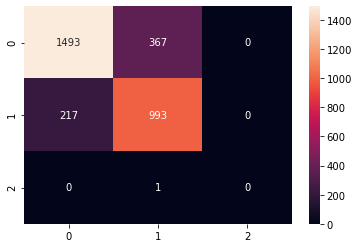

In [32]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

svm_model = SVC()
svm_model.fit(X_train_features,Y_train)


generate_f1(svm_model, X_train_features, Y_train)
generate_f1_and_heatmap(svm_model, X_test_features, Y_test)

f1_train :  0.6920
f1_test :  0.6968
Y axis : Actual Value.
X axis : Predicted Value.


1

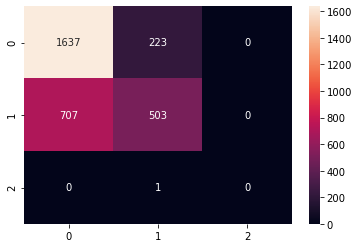

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

lr_model = LogisticRegression()
lr_model.fit(X_train_features,Y_train)

generate_f1(lr_model, X_train_features, Y_train)
generate_f1_and_heatmap(lr_model, X_test_features, Y_test)

f1_train :  0.8949
f1_test :  0.8567
Y axis : Actual Value.
X axis : Predicted Value.


1

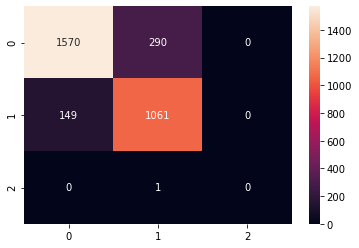

In [34]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()
knn_model.fit(X_train_features,Y_train)

generate_f1(knn_model, X_train_features, Y_train)
generate_f1_and_heatmap(knn_model, X_test_features, Y_test)

f1_train :  0.9995
f1_test :  0.8255
Y axis : Actual Value.
X axis : Predicted Value.


1

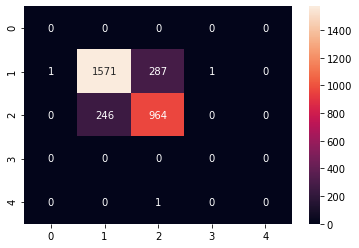

In [35]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_features,Y_train)

generate_f1(dt_model, X_train_features, Y_train)
generate_f1_and_heatmap(dt_model, X_test_features, Y_test)

f1_train :  0.9995
f1_test :  0.8974
Y axis : Actual Value.
X axis : Predicted Value.


1

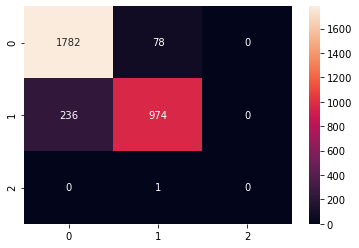

In [36]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train_features,Y_train)

generate_f1(rf_model, X_train_features, Y_train)
generate_f1_and_heatmap(rf_model, X_test_features, Y_test)

f1_train :  0.9994
f1_test :  0.9092
Y axis : Actual Value.
X axis : Predicted Value.


1

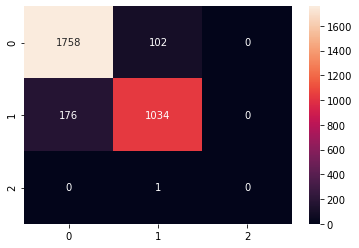

In [37]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(eval_metric='mlogloss')
xgb_model.fit(X_train_features, Y_train)

generate_f1(xgb_model, X_train_features, Y_train)
generate_f1_and_heatmap(xgb_model, X_test_features, Y_test)

f1_train :  0.9499
f1_test :  0.8434
Y axis : Actual Value.
X axis : Predicted Value.


1

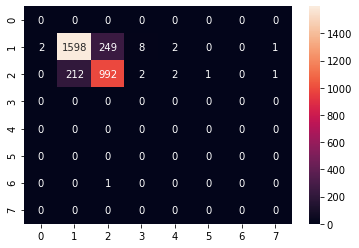

In [38]:
import lightgbm as lgb
lgbm_model = lgb.LGBMClassifier()
lgbm_model.fit(X_train_features, Y_train)

generate_f1(lgbm_model, X_train_features, Y_train)
generate_f1_and_heatmap(lgbm_model, X_test_features, Y_test)